In [1]:
# Thresholding
import cv2
from pytesseract import Output, pytesseract
import numpy as np
from imutils.object_detection import non_max_suppression
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    # fig = plt.figure(figsize=(11.69,8.27)) # A4 사이즈
    fig = plt.figure(figsize=(16.53, 11.69))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
# EAST(Efficient Accurate Scene Text Detector;효율적이고 정확한 장면 텍스트 감지기)
# Deep Learning Model
# 이미지에서 특징을 찾기 위해 합성곱 레이어를 사용함.
# DNN

In [4]:
# Text Detection with EAST
detector = './OCR_with_Python/Models/frozen_east_text_detection.pb'
width, height = 320, 320
image = './OCR_with_Python/Images/cup.jpg'
min_confidence = 0.9

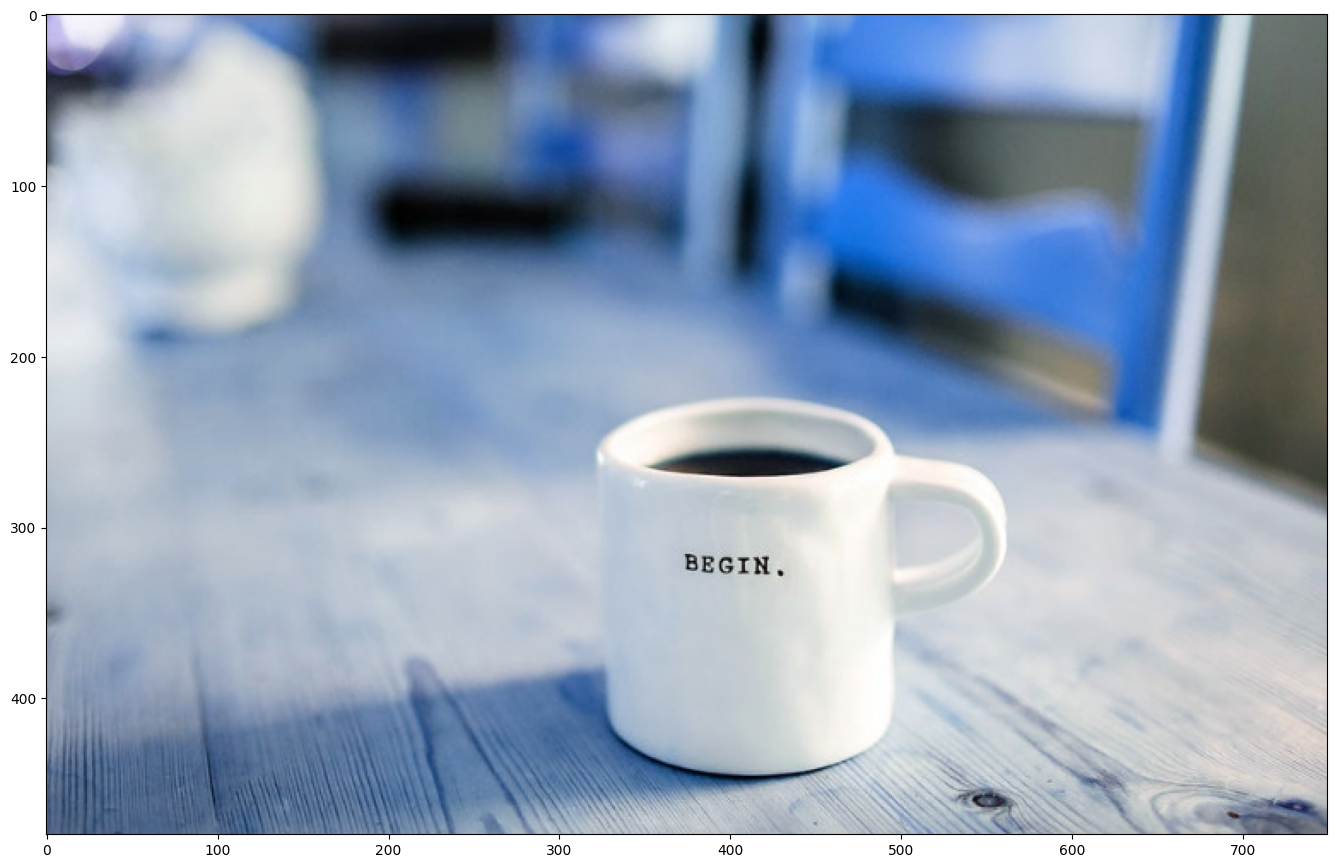

In [5]:
img = cv2.imread(image)
display(img)

In [6]:
original_img = img.copy()
img.shape

(480, 750, 3)

In [7]:
H = img.shape[0]
W = img.shape[1]
print(H, W)

480 750


In [8]:
proportion_W = W / float(width)
proportion_H = H / float(height)

print(proportion_W, proportion_H)

2.34375 1.5


320 320


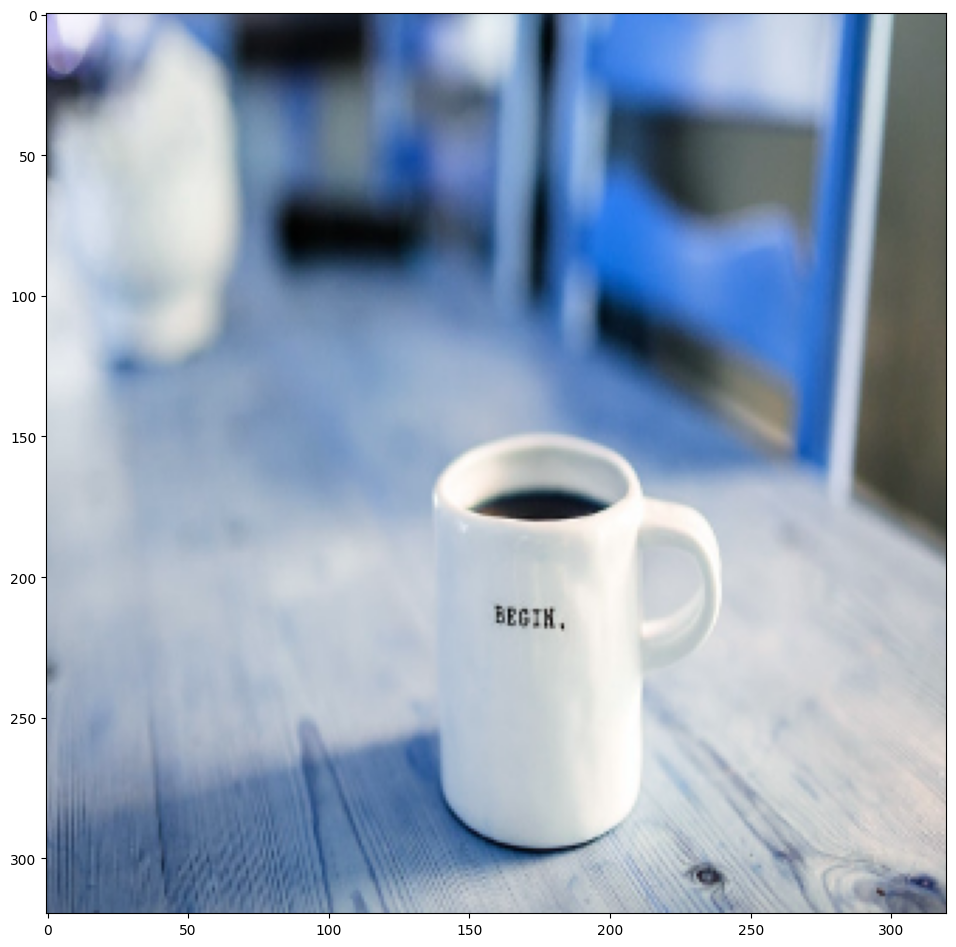

In [9]:
img = cv2.resize(img, (width, height))
H = img.shape[0]
W = img.shape[1]
print(H, W)
display(img)

In [22]:
# Loading the neural network

layers_names = ['feature_fusion/Conv_7/Sigmoid', 'feature_fusion/concat_3']
neural_network = cv2.dnn.readNet(detector)

In [12]:
img.shape

(320, 320, 3)

In [13]:
blob = cv2.dnn.blobFromImage(img, 1.0, (W, H), swapRB=True, crop=False)
blob.shape # Batch Size

(1, 3, 320, 320)

In [14]:
neural_network.setInput(blob)
scores, geometry = neural_network.forward(layers_names)

In [15]:
scores

array([[[[1.4775183e-07, 5.3355325e-07, 6.1831190e-07, ...,
          2.3887444e-06, 2.1422467e-07, 1.9741562e-06],
         [2.2155248e-07, 8.2297476e-08, 1.5269326e-07, ...,
          3.8021703e-06, 2.4969086e-07, 2.0974837e-06],
         [2.4107598e-07, 2.5650635e-07, 6.7496660e-07, ...,
          4.4842459e-06, 6.0891395e-08, 2.5159140e-06],
         ...,
         [5.1902941e-07, 1.3470725e-07, 3.8078490e-08, ...,
          1.7954446e-06, 7.7535549e-07, 5.4700849e-06],
         [2.8565972e-07, 8.5580076e-08, 1.1289849e-07, ...,
          1.1354846e-06, 9.0157494e-07, 5.0782419e-06],
         [7.2199100e-08, 8.4333314e-09, 5.4603602e-09, ...,
          1.9142327e-07, 3.1659505e-07, 1.0240367e-07]]]], dtype=float32)

In [16]:
geometry

array([[[[ 1.54848892e+02,  1.01938675e+02,  1.08211121e+02, ...,
           1.33965591e+02,  1.27577316e+02,  1.46967972e+02],
         [ 1.19407852e+02,  6.46941986e+01,  7.18581772e+01, ...,
           9.02676010e+01,  8.52865829e+01,  1.03320297e+02],
         [ 1.22548691e+02,  6.90612030e+01,  7.86800308e+01, ...,
           1.06369835e+02,  1.01670235e+02,  1.14973686e+02],
         ...,
         [ 1.16457314e+02,  4.99966507e+01,  3.75176544e+01, ...,
           8.21259842e+01,  8.12639847e+01,  1.21695618e+02],
         [ 1.27623383e+02,  5.88199654e+01,  4.84033051e+01, ...,
           8.31772232e+01,  8.09340973e+01,  1.11183907e+02],
         [ 1.26661522e+02,  7.53629608e+01,  6.93248215e+01, ...,
           1.27025345e+02,  1.18697968e+02,  1.47223724e+02]],

        [[ 1.09559761e+02,  9.52128754e+01,  9.08699265e+01, ...,
           1.00495575e+02,  9.43882065e+01,  1.12618622e+02],
         [ 8.27181091e+01,  5.77866745e+01,  5.62353096e+01, ...,
           6.53349609e

In [17]:
geometry[0,0,0]

array([154.84889 , 101.938675, 108.21112 , 110.35279 , 111.58001 ,
       113.07217 , 114.39852 , 116.147514, 115.30821 , 115.90372 ,
       117.41568 , 118.78156 , 116.54512 , 116.346   , 121.443306,
       129.47717 , 137.60803 , 143.02376 , 146.83208 , 149.02917 ,
       149.08723 , 148.28302 , 147.13014 , 145.16956 , 143.07384 ,
       140.95242 , 138.77011 , 137.29422 , 134.19771 , 131.39842 ,
       129.34822 , 127.54958 , 126.74279 , 125.23266 , 120.42207 ,
       117.427284, 116.221695, 116.09968 , 116.904205, 118.21094 ,
       119.18676 , 123.20284 , 125.417755, 126.3855  , 126.154854,
       126.19303 , 126.85886 , 126.928   , 128.21808 , 128.5202  ,
       128.97592 , 129.40462 , 130.3091  , 130.73267 , 130.80646 ,
       130.30138 , 129.3221  , 127.84739 , 126.378006, 125.06283 ,
       124.117935, 123.3759  , 122.265175, 120.858215, 120.00342 ,
       119.06399 , 117.834206, 116.9943  , 115.74399 , 117.56077 ,
       119.88263 , 121.395935, 125.46854 , 121.87916 , 120.994

In [18]:
scores.shape

(1, 1, 80, 80)

In [19]:
scores.shape[2:4]

(80, 80)

In [20]:
rows, columns = scores.shape[2:4]

In [21]:
boxes = []
confidences = []